In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
credit_df = pd.read_csv(r"data\Project 1 Finance Predictive Analysis-ML.csv")
credit_df.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


### Created a new column - loan duration
<h3>loan duration is the number of days from the disbursed date to the due date</h3> 

In [3]:
# Convert the date strings to datetime objects
from datetime import datetime

credit_df['due_date'] = pd.to_datetime(credit_df['due_date'])
credit_df['disbursement_date'] = pd.to_datetime(credit_df['disbursement_date'])

# Calculate the difference between the two dates and store it in a new column
credit_df['loan_duration'] = (credit_df['due_date'] - credit_df['disbursement_date']).dt.days

# Output the DataFrame with the new column
credit_df
# print("The difference between the two dates is:", date_difference.days, "days")

C:\Users\Owner\AppData\Local\Temp\ipykernel_25928\3387617212.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  credit_df['due_date'] = pd.to_datetime(credit_df['due_date'])
C:\Users\Owner\AppData\Local\Temp\ipykernel_25928\3387617212.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  credit_df['disbursement_date'] = pd.to_datetime(credit_df['disbursement_date'])


,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status,loan_duration
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,2018-04-24,2018-08-14,False,112
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,2023-01-12,2023-04-05,False,83
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,2019-11-27,2020-02-24,False,89
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,2021-09-11,2022-02-25,False,167
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,2020-09-11,2020-12-29,False,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-00002992,LN00001103,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,23-01-2022,11-02-2022,2022-02-14,2022-06-13,False,119
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,12-05-2018,17-05-2018,2018-05-27,2018-11-20,False,177
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14-10-2022,29-10-2022,2022-11-06,2023-04-08,True,153
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21-07-2018,06-08-2018,2018-08-20,2019-01-21,False,154


In [4]:
credit_df["default_status"].value_counts()

default_status
False    4001
True      999
Name: count, dtype: int64

### Choose only relevant columns

In [5]:
#the application_date, approval_date, disbursement_date, due_date has been dropped
credit_df = credit_df[["loan_type", "loan_amount","interest_rate","employment_type","income_level", "credit_score", "gender","marital_status", "education_level","loan_duration","default_status"]]
credit_df.head()

,loan_type,loan_amount,interest_rate,employment_type,income_level,credit_score,gender,marital_status,education_level,loan_duration,default_status
0,Car Loan,16795,0.051852,Self-employed,Medium,833,Male,Single,Master,112,False
1,Personal Loan,1860,0.089296,Full-time,Medium,776,Female,Married,Bachelor,83,False
2,Personal Loan,77820,0.070470,Full-time,Low,697,Male,Divorced,High School,89,False
3,Car Loan,55886,0.062155,Full-time,Low,795,Female,Married,PhD,167,False
4,Home Loan,7265,0.070635,Part-time,Low,519,Female,Married,High School,109,False


In [6]:
credit_df["default_status"].value_counts()

default_status
False    4001
True      999
Name: count, dtype: int64

### Change the categorical data to numeric

In [7]:
# The categorical data are loan_type, employment_type, income_level, gender, marital_status, education_level, default_status
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

credit_df["loan_type"] = LabelEncoder.fit_transform(credit_df["loan_type"])
credit_df["employment_type"] = LabelEncoder.fit_transform(credit_df["employment_type"])
credit_df["income_level"] = LabelEncoder.fit_transform(credit_df["income_level"])
credit_df["gender"] = LabelEncoder.fit_transform(credit_df["gender"])
credit_df["marital_status"] = LabelEncoder.fit_transform(credit_df["marital_status"])
credit_df["education_level"] = LabelEncoder.fit_transform(credit_df["education_level"])
credit_df["default_status"] = LabelEncoder.fit_transform(credit_df["default_status"])

credit_df



C:\Users\Owner\AppData\Local\Temp\ipykernel_25928\2520410569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df["loan_type"] = LabelEncoder.fit_transform(credit_df["loan_type"])
C:\Users\Owner\AppData\Local\Temp\ipykernel_25928\2520410569.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_df["employment_type"] = LabelEncoder.fit_transform(credit_df["employment_type"])
C:\Users\Owner\AppData\Local\Temp\ipykernel_25928\2520410569.py:7: SettingWithCopyWarning: 
A value is trying to be set on

,loan_type,loan_amount,interest_rate,employment_type,income_level,credit_score,gender,marital_status,education_level,loan_duration,default_status
0,0,16795,0.051852,2,2,833,1,2,2,112,0
1,3,1860,0.089296,0,2,776,0,1,0,83,0
2,3,77820,0.070470,0,1,697,1,0,1,89,0
3,0,55886,0.062155,0,1,795,0,1,3,167,0
4,2,7265,0.070635,1,1,519,0,1,1,109,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,37945,0.070087,2,0,511,1,1,3,119,0
4996,3,48937,0.056405,1,2,502,1,2,3,177,0
4997,2,7476,0.064212,0,0,452,0,2,1,153,1
4998,0,52756,0.094914,2,2,728,1,1,3,154,0


In [8]:
credit_df.columns


Index(['loan_type', 'loan_amount', 'interest_rate', 'employment_type',
       'income_level', 'credit_score', 'gender', 'marital_status',
       'education_level', 'loan_duration', 'default_status'],
      dtype='object')

### Identify the features and Targets

In [9]:
X = np.asanyarray(credit_df[['loan_type', 'loan_amount', 'interest_rate', 'employment_type',
       'income_level', 'credit_score', 'gender', 'marital_status',
       'education_level','loan_duration']])
X

array([[0.0000000e+00, 1.6795000e+04, 5.1851709e-02, ..., 2.0000000e+00,
        2.0000000e+00, 1.1200000e+02],
       [3.0000000e+00, 1.8600000e+03, 8.9295672e-02, ..., 1.0000000e+00,
        0.0000000e+00, 8.3000000e+01],
       [3.0000000e+00, 7.7820000e+04, 7.0469564e-02, ..., 0.0000000e+00,
        1.0000000e+00, 8.9000000e+01],
       ...,
       [2.0000000e+00, 7.4760000e+03, 6.4211792e-02, ..., 2.0000000e+00,
        1.0000000e+00, 1.5300000e+02],
       [0.0000000e+00, 5.2756000e+04, 9.4914482e-02, ..., 1.0000000e+00,
        3.0000000e+00, 1.5400000e+02],
       [3.0000000e+00, 9.1101000e+04, 8.3820967e-02, ..., 2.0000000e+00,
        2.0000000e+00, 1.4000000e+02]])

In [10]:
y = np.asanyarray(credit_df["default_status"])
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<h3> Normalize dataset </h3>

In [11]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.33965636, -1.15378622, -1.82077885,  1.22327807,  1.21940701,
         1.63771851,  0.98333878,  1.23850864,  0.43330448,  0.17152996],
       [ 1.32085541, -1.6738365 ,  0.63804616, -1.22818099,  1.21940701,
         1.27839553, -1.01694352,  0.01104715, -1.34544953, -0.50197445],
       [ 1.32085541,  0.97115975, -0.59820399, -1.22818099, -0.01406154,
         0.78038648,  0.98333878, -1.21641433, -0.45607253, -0.36262871],
       [-1.33965636,  0.20739793, -1.14419476, -1.22818099, -0.01406154,
         1.39816986, -1.01694352,  0.01104715,  1.32268148,  1.44886591],
       [ 0.43401815, -1.48562948, -0.58735223, -0.00245146, -0.01406154,
        -0.34170985, -1.01694352,  0.01104715, -0.45607253,  0.10185709]])

<h3> To avoid oversampling </h3>

In [12]:
# Apply SMOTE (Over-sampling)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Balanced Classes:", Counter(y_resampled))

Balanced Classes: Counter({0: 4001, 1: 4001})


<h3> Split into train /test dataset </h3>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (6401, 10) (6401,)
Test set: (1601, 10) (1601,)


### Using Logistic Regression: BaseLine Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(class_weight='balanced').fit(X_train,y_train)
LR

LogisticRegression(class_weight='balanced')

In [15]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [16]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.51129945, 0.48870055],
       [0.47357269, 0.52642731],
       [0.45794003, 0.54205997],
       ...,
       [0.4715925 , 0.5284075 ],
       [0.49112059, 0.50887941],
       [0.51320945, 0.48679055]])

<h3>Accuracy</h3>

In [17]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, yhat,average='weighted')
print("the f1 score of the dataset using xgboost is:", f1)

the f1 score of the dataset using xgboost is: 0.5290840458322346


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[437 381]
 [373 410]]


Confusion matrix, without normalization
[[437 381]
 [373 410]]


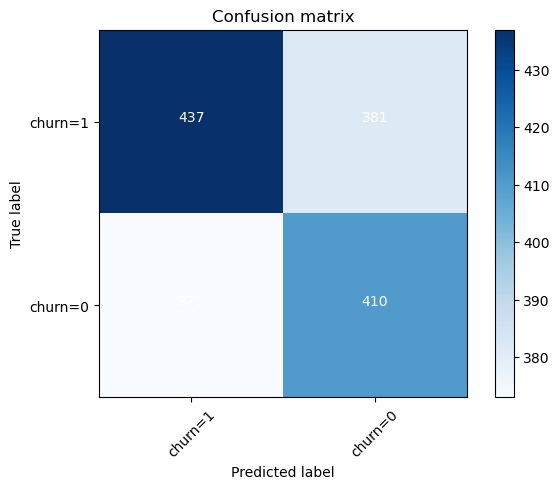

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [20]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52       783
           1       0.54      0.53      0.54       818

    accuracy                           0.53      1601
   macro avg       0.53      0.53      0.53      1601
weighted avg       0.53      0.53      0.53      1601



In [21]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6920032291895455

### For XGBOOST : Advanced model

In [22]:

from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_hat_new = model.predict(X_test)

c:\Users\Owner\anaconda3\envs\geospatial\lib\site-packages\xgboost\core.py:158: UserWarning: [21:02:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
yhat_prob_new = model.predict_proba(X_test)
yhat_prob_new

array([[2.75e-01, 7.25e-01],
       [8.76e-01, 1.24e-01],
       [1.71e-04, 1.00e+00],
       ...,
       [8.19e-01, 1.81e-01],
       [8.52e-01, 1.48e-01],
       [6.18e-01, 3.82e-01]], dtype=float32)

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_hat_new,average='weighted')
print("the f1 score of the dataset using xgboost is:", f1)

the f1 score of the dataset using xgboost is: 0.8482166960727772


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[437 381]
 [373 410]]


Confusion matrix, without normalization
[[636 182]
 [ 60 723]]


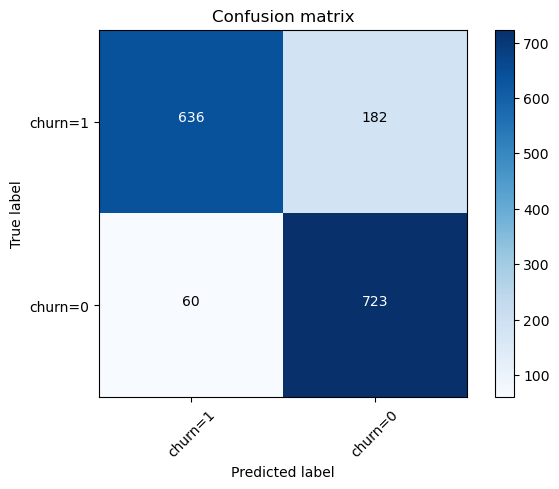

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_new, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [27]:
print (classification_report(y_test, y_hat_new))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       783
           1       0.91      0.78      0.84       818

    accuracy                           0.85      1601
   macro avg       0.86      0.85      0.85      1601
weighted avg       0.86      0.85      0.85      1601



In [28]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob_new)

0.3575363997180434